In [181]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means

In [182]:
df=pd.read_csv('income.csv')
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


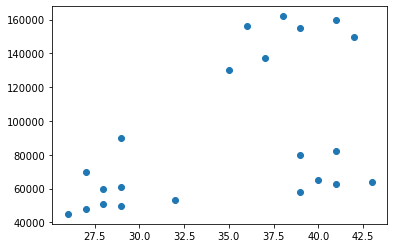

In [183]:
plt.scatter(df['Age'],df['Income($)'])

In [184]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [185]:
#to train the model, we should use fit_predict() method on the data
y_pred=km.fit_predict(df[['Age','Income($)']])

In [186]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [187]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [188]:
# now findout the coordinates of each cluster centers
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [189]:
# now findout the 'independent' and 'dependent' values 
X=km.cluster_centers_[:,0]
Y=km.cluster_centers_[:,1]

In [190]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

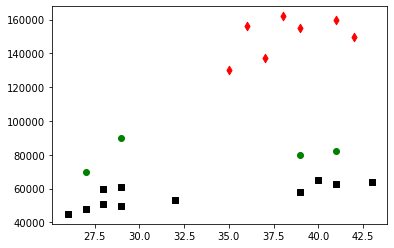

In [191]:
# Scatterplot the clusters
plt.scatter(df1.Age,df1['Income($)'],color='green',marker='o')
plt.scatter(df2.Age,df2['Income($)'],color='red',marker='d')
plt.scatter(df3.Age,df3['Income($)'],color='black',marker='s')

# now calculate the Min-Max Scalar

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [193]:
# now train the scaler on income,summpy the values as 2D array
# transform the income column and store in the datafram(df)
# df(income) --by adding this it will store in the original df 
df['Income($)']=scaler.fit_transform(df[['Income($)']])

In [194]:
df['Age']=scaler.fit_transform(df[['Age']])

In [195]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [196]:
# first we will create the K-means() class with 3 cluster Model and train it using fit_predict() method
#hind:- after creating the class we will train it by using fit method
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])

In [197]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [198]:
# now findout the 'independent' and 'dependent' values 
X=km.cluster_centers_[:,0]
Y=km.cluster_centers_[:,1]

In [199]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

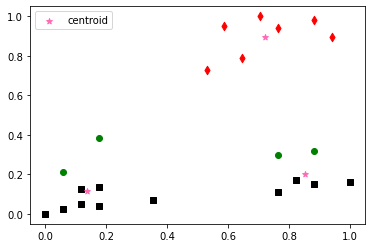

In [200]:
plt.scatter(df1.Age,df1['Income($)'],color='green',marker='o')
plt.scatter(df2.Age,df2['Income($)'],color='red',marker='d')
plt.scatter(df3.Age,df3['Income($)'],color='black',marker='s')
plt.scatter(X,Y,color='hotpink',marker='*',label='centroid')
plt.legend()


# Drawing the Elbow Plot

In [203]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)

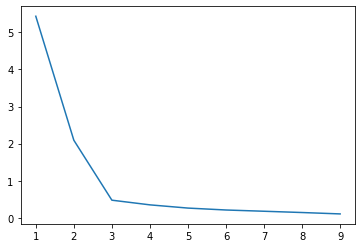

In [204]:
plt.plot(k_rng,sse)